In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv("Placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

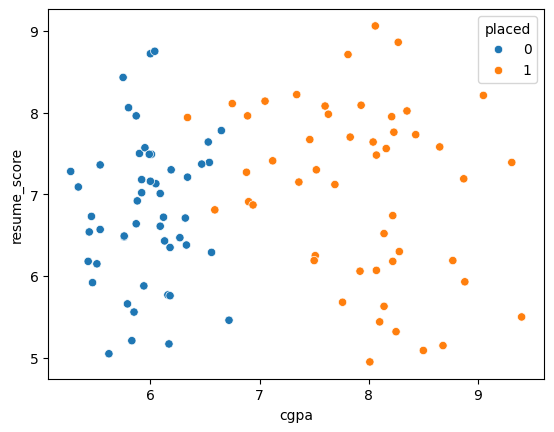

In [6]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [7]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Log loss as loss function
def log_loss(y_true, y_pred):
    epsilon = 1e-10  # Prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #clip says that y_pred belongs to [epsilon,1-epsilon]
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

In [9]:
X=df[['cgpa','resume_score']]
y=df['placed']

In [10]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
lr = 0.1
epochs = 10000

In [11]:
for epoch in range(epochs):
    # Linear combination
    z = np.dot(X, weights) + bias
    # Sigmoid activation
    y_pred = sigmoid(z)
    # Loss calculation
    loss = log_loss(y, y_pred)
    
    # Gradients
    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.mean(y_pred - y)
    
    # Update weights
    weights -= lr * dw
    bias -= lr * db
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6931
Epoch 1000, Loss: 0.3824
Epoch 2000, Loss: 0.3216
Epoch 3000, Loss: 0.2801
Epoch 4000, Loss: 0.2506
Epoch 5000, Loss: 0.2286
Epoch 6000, Loss: 0.2117
Epoch 7000, Loss: 0.1983
Epoch 8000, Loss: 0.1874
Epoch 9000, Loss: 0.1783


In [14]:
print("Final Weights:", weights)
print("Final Bias:", bias)

Final Weights: [ 2.70276732 -0.32534279]
Final Bias: -16.006909479396796


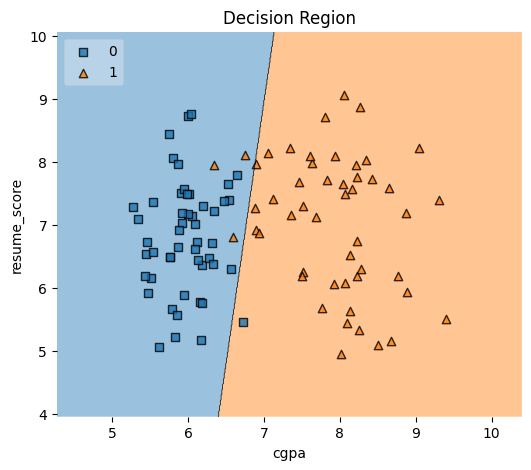

In [25]:
class Model:
    def predict(self, X_input):
        z = np.dot(X_input, weights) + bias
        return (sigmoid(z) >= 0.5).astype(int)

model = Model()

# Plot decision region using mlxtend
plt.figure(figsize=(6, 5))
plot_decision_regions(X.values, y.values, clf=model, legend=2)
plt.title("Decision Region")
plt.xlabel("cgpa")
plt.ylabel("resume_score")
plt.show()

In [26]:
y_pred = model.predict(X.values)

correct = np.sum(y_pred == y.values) 
total = len(y.values)                  

accuracy = correct / total

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.00%
